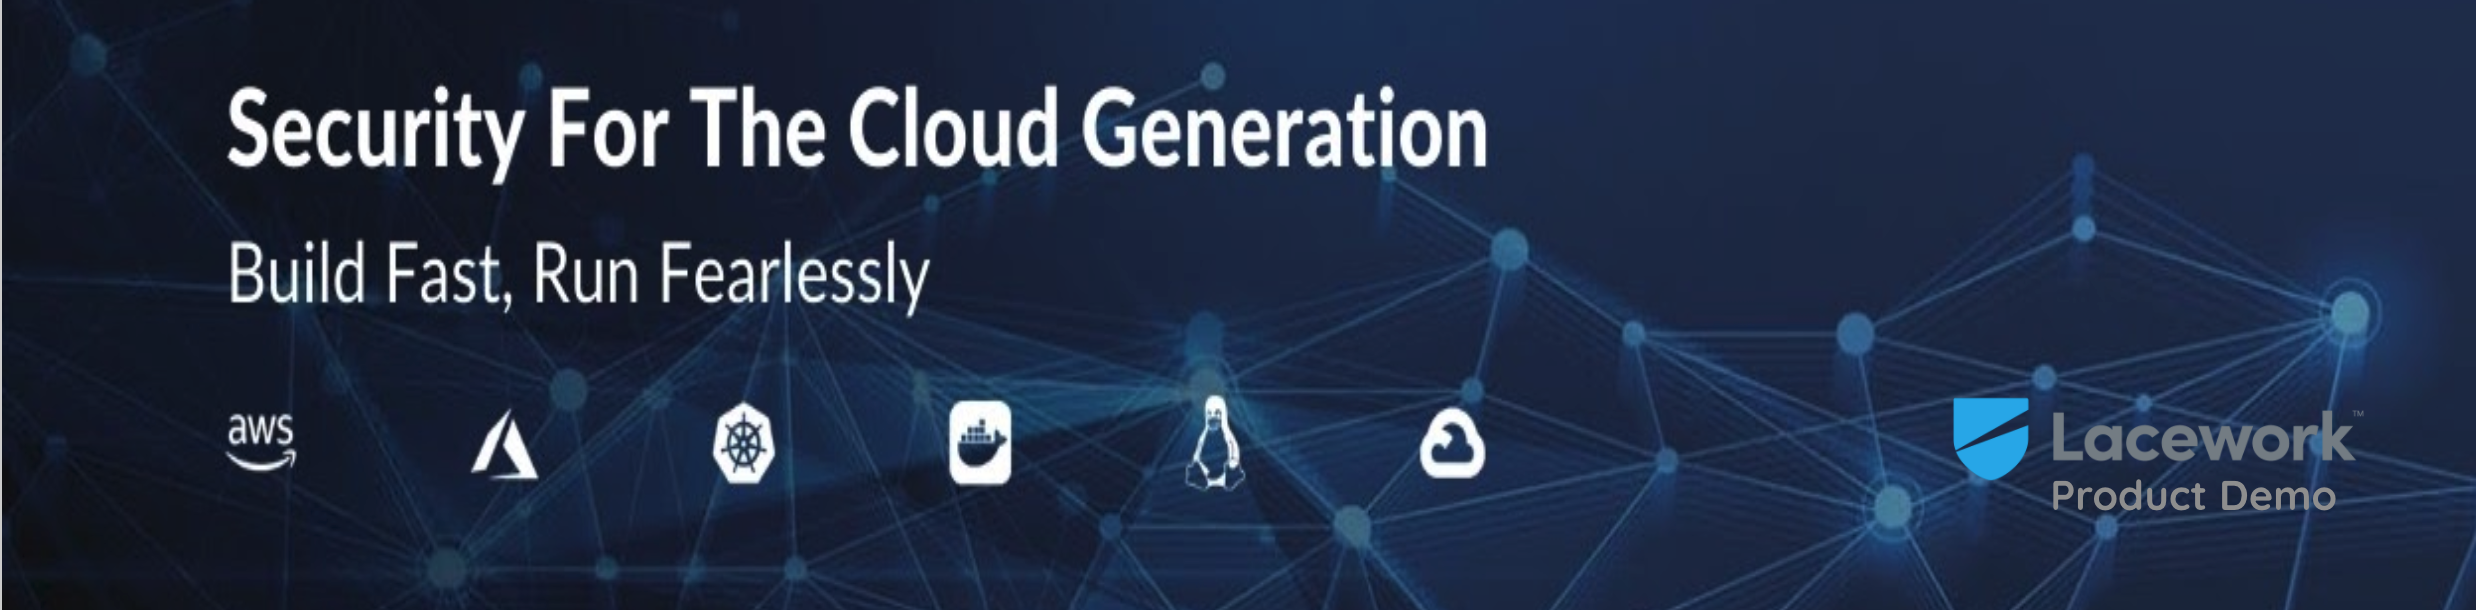

### **Lacework Shift-Left Security in your DevOps pipeline **

Shifting left builds quality earlier into the development cycle to reduce risks to production environments. 

- Elite performing companies use this technique to move confidently and deliver innovation at record speed
- Security teams can use the 'shift left' approach to greatly reduce vulnerabilities and drive security best practices at the speed of DevOps 

Through collaboration and data-driven decisions (and not blocking development), security teams can help organizations shift left fearlessly.  

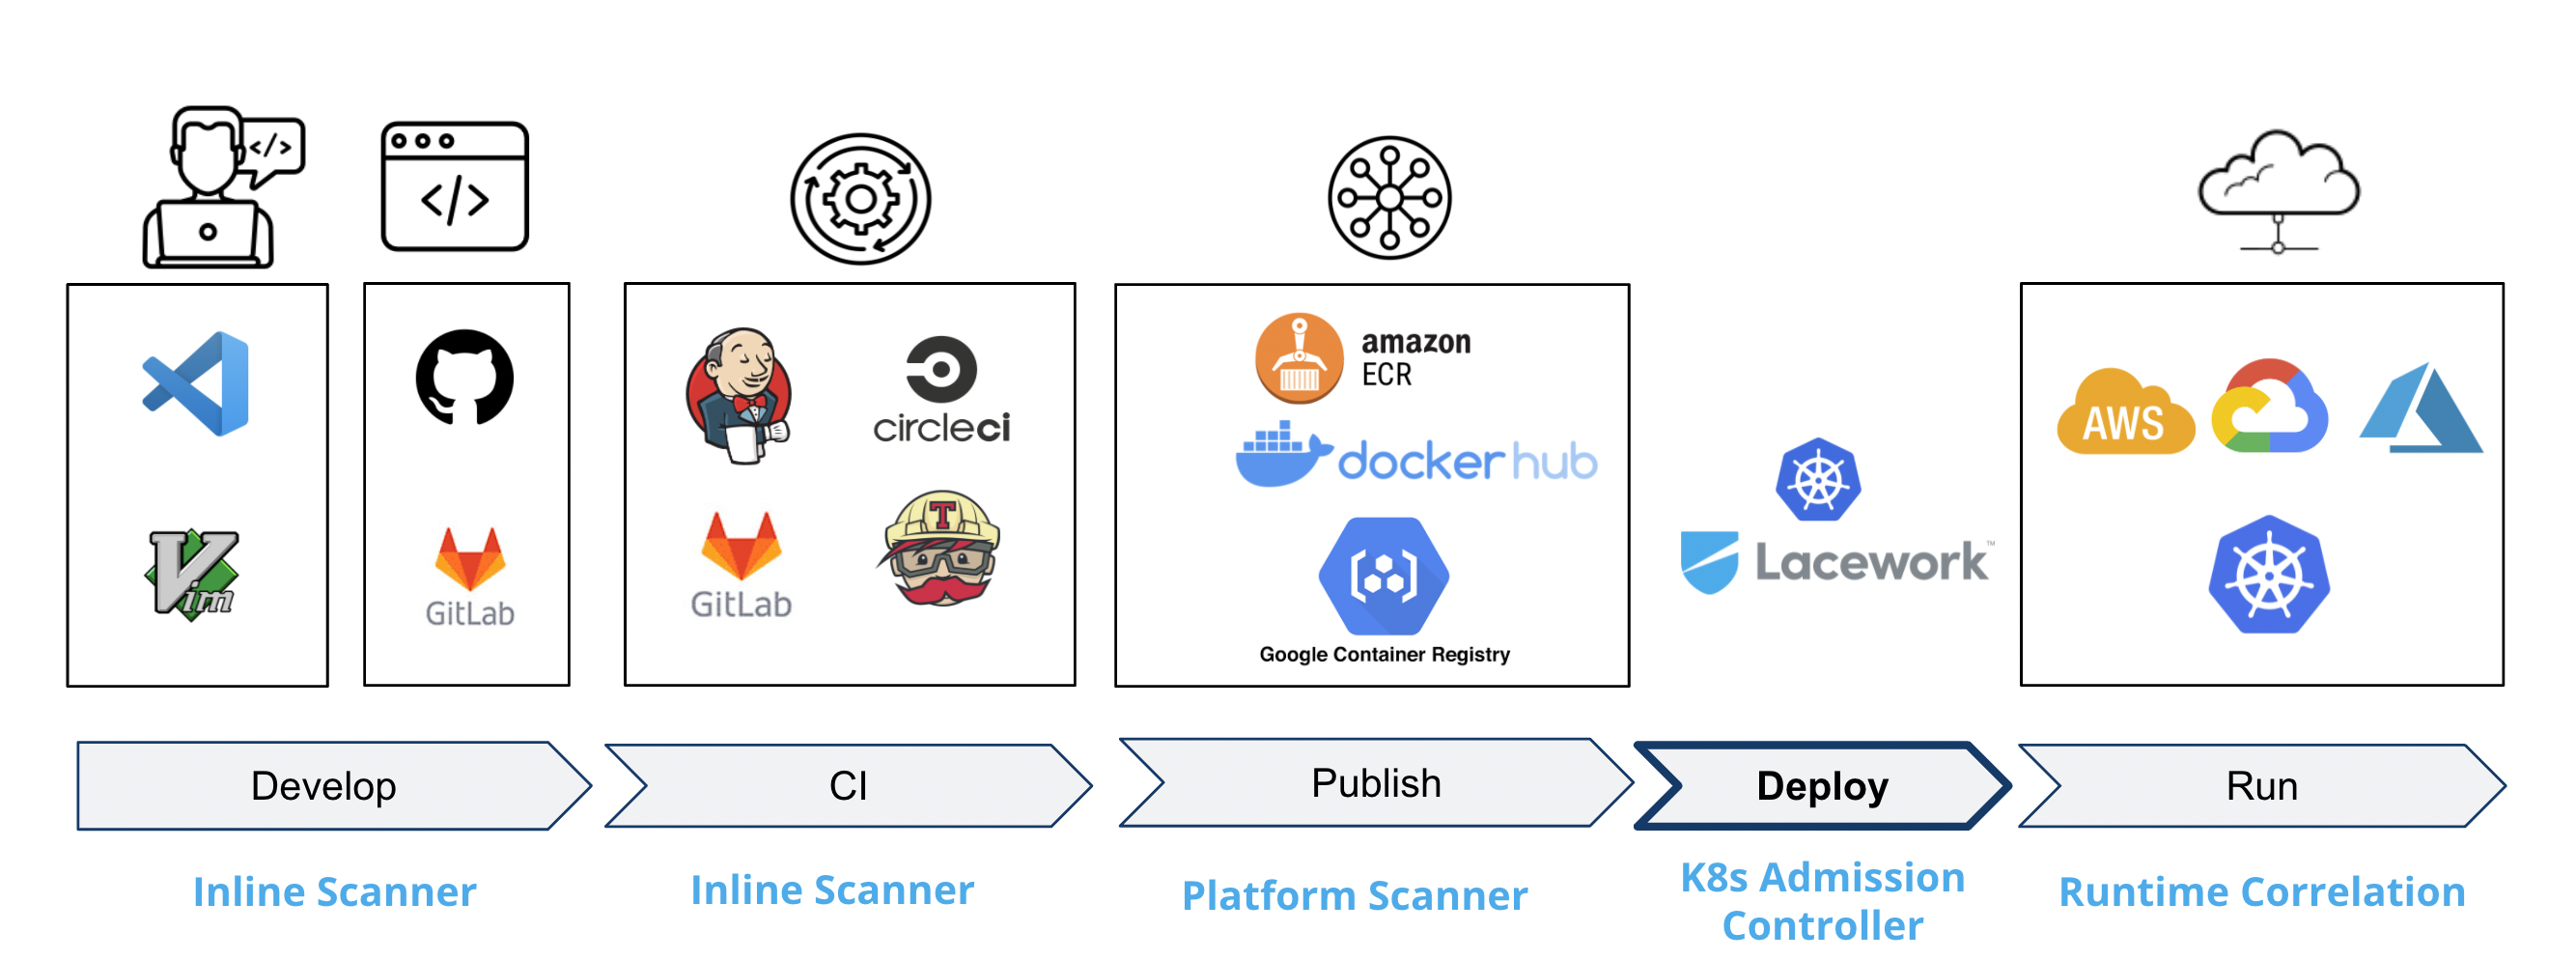

The lacework configure command is the fastest way to set up your Lacework CLI installation. The following command reads the downloaded JSON file and sets up a default configuration for the CLI.

### **Build and scan locally**  

**Customer need: Alert if S3 bucket is outside of France**

Let's build our image and scan it.
The --policy tells that we want to enforce security policies which have been enabled in Lacework platform

In [4]:
docker buildx build --platform linux/arm64 --load  -t jeromebaude/my-tweet-app-lacework:latest .

[+] Building 0.0s (0/1)                                                         
 => [internal] booting buildkit                                            0.0s
[+] Building 0.2s (0/1)                                                         
 => [internal] booting buildkit                                            0.2s
 => => pulling image moby/buildkit:buildx-stable-1                         0.2s
[+] Building 0.3s (0/1)                                                         
 => [internal] booting buildkit                                            0.3s
 => => pulling image moby/buildkit:buildx-stable-1                         0.3s
[+] Building 0.5s (0/1)                                                         
 => [internal] booting buildkit                                            0.5s
 => => pulling image moby/buildkit:buildx-stable-1                         0.5s
[+] Building 0.6s (0/1)                                                         
 => [internal] booting buildkit    

In [5]:
lw-scanner evaluate jeromebaude/my-tweet-app-lacework latest --policy --critical-violation-exit-code 1

Saving image: Done!
Getting image manifest: Done!
Gathering packages: Done!
Packaging image data: Done!
Evaluating image: Done!
                                  CONTAINER IMAGE DETAILS                                          VULNERABILITIES          
------------------------------------------------------------------------------------------+---------------------------------
    ID          sha256:d0b36f5535b64ad53127109c28f1c2386cf3e3199bb9e3a6684f42dc0a825179       SEVERITY   COUNT   FIXABLE    
    Digest                                                                                  -----------+-------+----------  
    Registry                                                                                  Critical       1         1    
    Repository  jeromebaude/my-tweet-app-lacework                                             High           0         0    
    Size        62.6 MB                                                                       Medium         0         0  

: 1

You see that our image is vulnerable


In [6]:
cp Dockerfile.novuln Dockerfile

Let's build it again


In [7]:
docker buildx build --platform linux/arm64 --load  -t jeromebaude/my-tweet-app-lacework:latest .

[+] Building 0.0s (0/0)                                                         
[+] Building 0.0s (0/0)                                                         
[+] Building 0.0s (0/1)                                                         
[+] Building 0.1s (2/3)                                                         
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 307B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for docker.io/library/alpine:latest           0.0s
[+] Building 0.3s (2/3)                                                         
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 307B                                       0.0s
 => [internal] load .dockerignore  

Let's scan it again

In [8]:
lw-scanner evaluate jeromebaude/my-tweet-app-lacework latest --policy --critical-violation-exit-code 1

Saving image: Done!
Getting image manifest: Done!
Gathering packages: Done!
Packaging image data: Done!
Evaluating image: Done!
Good news! This image has no vulnerabilities.


Let's run it locally

In [9]:
docker run -it -p 5000:5000 -d jeromebaude/my-tweet-app-lacework:latest

1cc58ac549b62894f2e40d87c6eb702a74798e9c86dc5220c257ec1558f3b706


In [10]:
git add Dockerfile; git commit -m "fixing Dockerfile"; git push

[main 2b2ddab] fixing Dockerfile
 Committer: Jerome Baude <jba@mymac.local>
Your name and email address were configured automatically based
on your username and hostname. Please check that they are accurate.
You can suppress this message by setting them explicitly. Run the
following command and follow the instructions in your editor to edit
your configuration file:

    git config --global --edit

After doing this, you may fix the identity used for this commit with:

    git commit --amend --reset-author

 1 file changed, 1 insertion(+), 1 deletion(-)
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 8 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 293 bytes | 293.00 KiB/s, done.
Total 3 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/jeromebaude/my-tweet-app-lacework.git
   3f7407f..2b2ddab  main -> main


** Deploy **

Let's deploy our container

In [11]:
kubectl apply -f ./deployment/deployment.yaml

deployment.apps/my-tweet-app configured


The k8s Admission Controler is blocking us from deploying this pod.

Indeed using the tag latest is not a good practice. Let's use our SHA number. Let's update our deployment.yaml


In [12]:
kubectl apply -f ./deployment/deployment.yaml

deployment.apps/my-tweet-app configured


**END**

**cleanup**

In [ ]:
docker rm -f $(docker ps -q)

In [ ]:
cp Dockerfile.vuln Dockerfile

In [ ]:
cp ./deployment/deployment.yaml.org ./deployment/deployment.yaml